In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

✅ Step 1: Problem Understanding

Objective:
Build a classification model to predict whether a user will purchase (purchased = 1) or not (purchased = 0) based on:

    Age

    Income

    Score

Business Goal:
Help marketing team identify high-potential users to target.

In [15]:
np.random.seed(123)
df = pd.DataFrame({
    "age":np.random.randint(18,65,100),
    "income":np.random.randint(25000,140000,100),
    "score":np.round(np.random.uniform(0,1,100),2),
    "purchage":np.random.choice([0,1],100)
})

✅ Step 3: Data Preprocessing & Cleaning

In [ ]:
# check null value
# df.isnull().sum()
# df.duplicated().sum()
# df.dtypes
# df.loc[5,'income']=np.nan
# df['income'].fillna(df['income'].mean(),inplace=True)

age           int32
income        int32
score       float64
purchage      int64
dtype: object

Text(0.5, 0, 'income')

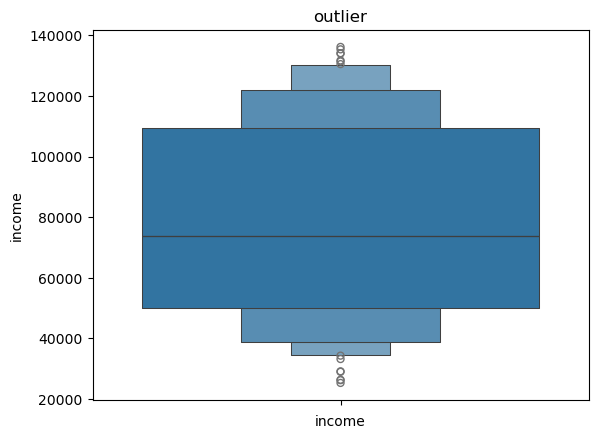

In [21]:
#outlier
import seaborn as sns
sns.boxenplot(df['income'])
plt.title("outlier")
plt.xlabel("income")

✅ Step 4: Exploratory Data Analysis (EDA)

In [22]:
df.describe()

,age,income,score,purchage
count,100.000000,100.00000,100.000000,100.000000
mean,40.510000,79238.40000,0.489300,0.490000
std,13.645953,32694.28809,0.274731,0.502418
min,18.000000,25321.00000,0.010000,0.000000
25%,29.000000,50070.25000,0.267500,0.000000
50%,40.000000,73704.50000,0.490000,0.000000
75%,52.000000,109342.00000,0.690000,1.000000
max,64.000000,136227.00000,0.990000,1.000000


<Axes: >

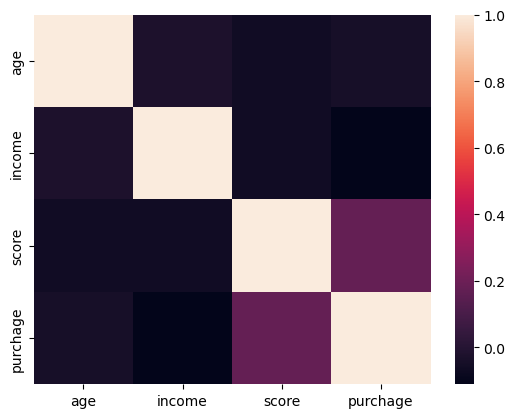

In [23]:
#correlation
sns.heatmap(df.corr())

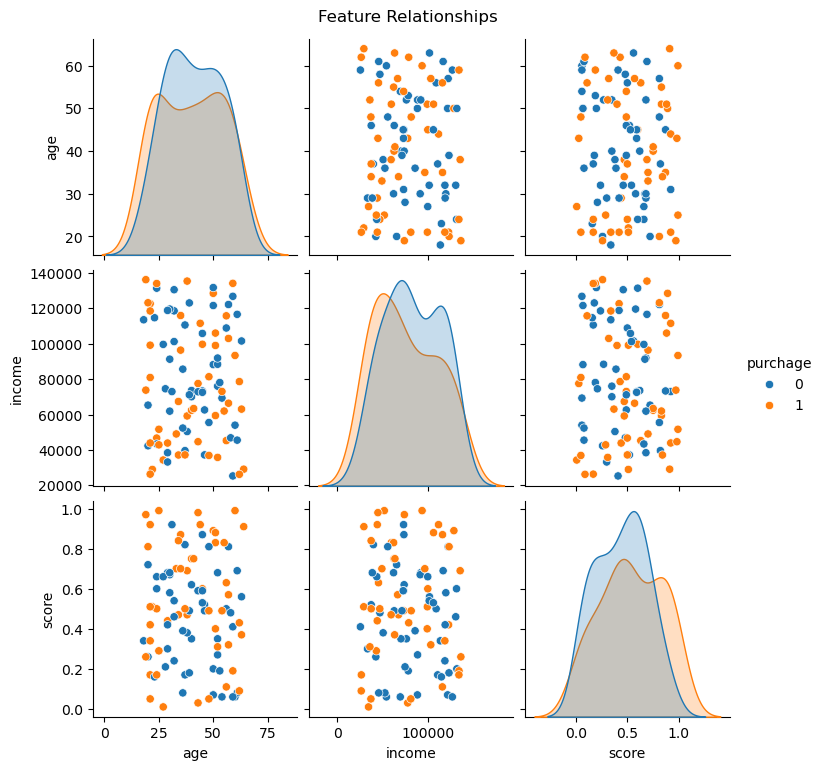

In [26]:
# Pairplot to understand patterns
sns.pairplot(df, hue='purchage')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

In [27]:
df.corr()

,age,income,score,purchage
age,1.000000,-0.025299,-0.062682,-0.042711
income,-0.025299,1.000000,-0.059946,-0.111068
score,-0.062682,-0.059946,1.000000,0.178142
purchage,-0.042711,-0.111068,0.178142,1.000000


In [28]:
df.corr()['income']

age        -0.025299
income      1.000000
score      -0.059946
purchage   -0.111068
Name: income, dtype: float64

In [29]:
df.corr().round(2)

,age,income,score,purchage
age,1.00,-0.03,-0.06,-0.04
income,-0.03,1.00,-0.06,-0.11
score,-0.06,-0.06,1.00,0.18
purchage,-0.04,-0.11,0.18,1.00


Use corrwith() to compare two sets of columns

If you want to compare how a group of features correlates with a target:

In [33]:
df[['age', 'income', 'score']].corrwith(df['purchage'])

age      -0.042711
income   -0.111068
score     0.178142
dtype: float64

✅ Step 5: Feature Engineering

Since all features are numerical and ready for modeling, minimal work is needed.

Optionally, we can create new features like:

In [35]:
# Create income per age as a derived feature
df['income_per_age'] = df['income'] / df['age']

✅ Step 6: Data Splitting

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df.columns

Index(['age', 'income', 'score', 'purchage', 'income_per_age'], dtype='object')

In [39]:
x =df.drop('purchage',axis=1)

In [40]:
y=df['purchage']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Step 7: Model Selection

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()

✅ Step 8: Model Training

In [46]:
model.fit(X_train,y_train)

c:\Users\01934L744\miniforge3\envs\Ms_agentic_hack_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

✅ Step 9: Model Evaluation

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
y_pred = model.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred=y_pred)

0.45

In [50]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.48        11
           1       0.40      0.44      0.42         9

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.45        20
weighted avg       0.45      0.45      0.45        20



In [51]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[5 6]
 [5 4]]


✅ Step 10: Hyperparameter Tuning